In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from src.data.metrics import get_metrics

In [3]:
df = pd.read_json("../reports/embed_level_weights.jsonl", lines=True)
metrics = ['top_1_accuracy', "top_5_accuracy", 'macro_f1']
get_metrics(df, metrics)

In [7]:
hparams = ["model_cls", "embedding_weight_factor", "embedding_type"]
dfm = df.groupby(hparams)[
    metrics
].agg(["mean", "std"]).reset_index()


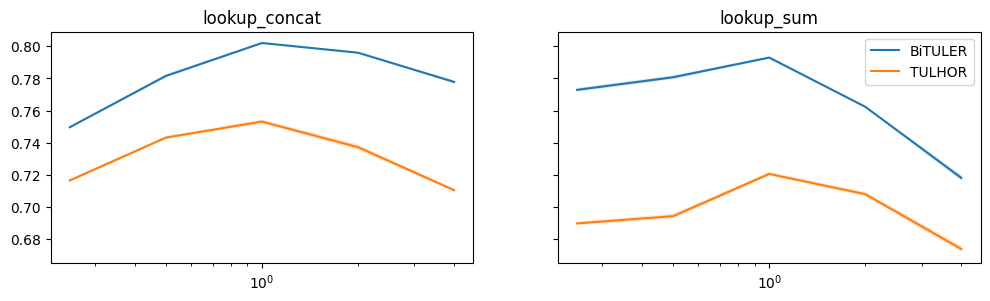

In [18]:
dfp = dfm
metric = "top_5_accuracy"
fig, axs = plt.subplots(ncols=2, figsize=(12, 3), sharey=True)
for ax, (emb_type, df_col) in zip(axs, dfp.groupby("embedding_type")):
    ax.set_title(emb_type)
    for model, df_line in df_col.groupby("model_cls"):
        x = df_line["embedding_weight_factor"]
        y = df_line[("top_5_accuracy", "mean")]
        std = df_line[('top_5_accuracy', 'std')]
        ax.plot(x, y, label=model)
        ax.fill_between(x, y-std, y+std, alpha=0.2)

    ax.set_xscale("log")
ax.legend()